# We need to predict if the client will be able to repay the loan or not

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
at = pd.read_csv('Application_train.csv')
bu = pd.read_csv('bureau.csv')
bub = pd.read_csv('bureau_balance.csv')
pcb = pd.read_csv('POS_CASH_balance.csv')
ccb =pd.read_csv('credit_card_balance.csv')
pa = pd.read_csv('previous_application.csv')
ip = pd.read_csv('installments_payments.csv')


In [3]:
print ("application_train:", at.shape)
print ("bureau                :", bu.shape)
print ("bureau_balance:", bub.shape)
print ("credit_card_balance:",ccb.shape)
print ("installments_payments:",ip.shape)
print ("pos_cash_balance:",pcb.shape)
print ("previous_application  :",pa.shape)

application_train: (307511, 122)
bureau                : (1716428, 17)
bureau_balance: (27299925, 3)
credit_card_balance: (3840312, 23)
installments_payments: (13605401, 8)
pos_cash_balance: (10001358, 8)
previous_application  : (1670214, 37)


application_train.csv: This is the main table with Terget variable.The training applicaton data comes with the TARGET indicating 0: the loan was repaid of 1: the loan was not repaid.

bureau.csv: All client’s previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

bureau_balance.csv: Monthly balances of previous credits in Credit Bureau.

POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

credit_card_balance.csv: Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

previous_application.csv: All previous applications for Home Credit loans of clients who have loans in our sample.

installments_payments.csv: Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

# 1. Existing Approaches

In [4]:
at.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
at.shape

(307511, 122)

In [6]:
at.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
at.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
pd.set_option('display.max_rows', at.shape[0])
at.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


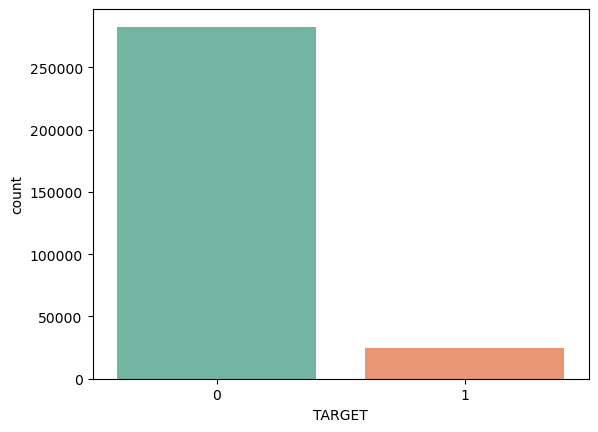

In [9]:
sns.countplot(x = "TARGET", data = at, palette="Set2")
at.loc[:, 'TARGET'].value_counts()
plt.show()

The data has target = 0 for people who can repay the loan and target = 1 for people who cannot repay the loan. The data is imbalanced because there is a high number of clients who repay the loan compared to clients who default.

In [10]:
pd.DataFrame(at.isnull().sum().sort_values(ascending = False))

,0
COMMONAREA_MEDI,214865
COMMONAREA_AVG,214865
COMMONAREA_MODE,214865
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
NONLIVINGAPARTMENTS_MEDI,213514
FONDKAPREMONT_MODE,210295
LIVINGAPARTMENTS_MODE,210199
LIVINGAPARTMENTS_AVG,210199
LIVINGAPARTMENTS_MEDI,210199


In [11]:
# Function to calculate missing values by column
def missing_values_table(data):
    # Total missing values
    mis_val = at.isnull().sum()
    mis_val_percent = 100 * at.isnull().sum() / len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: 'Missing Values', 1: '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print('Your selected dataframe has ' + str(at.shape[1]) +
         " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    return mis_val_table_ren_columns

In [12]:
missing_values = missing_values_table(at)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [13]:
at.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [14]:
at.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [15]:
def plot_bar_gen(
    colname,
    df=None,
    other_arg=None,
    show=True,
    palette="Set2",
    orientation_horizontal=False
):
    if df is None:
        df = at   

    temp = df[colname].value_counts()
    df1 = pd.DataFrame({
        colname: temp.index,
        'Number of contracts': temp.values
    })

    cat_perc = df[[colname, 'TARGET']].groupby([colname], as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    sns.set_color_codes("bright")

    if orientation_horizontal:
        plt.figure(figsize=(10, 6))
        plt.subplot(121)
        s1 = sns.barplot(
            y=colname,
            x="Number of contracts",
            data=df1,
            palette=palette
        )
        plt.subplot(122)
        s2 = sns.barplot(
            y=colname,
            x='TARGET',
            data=cat_perc,
            palette=palette
        )
        plt.xlabel('Fraction of loans defaulted', fontsize=12)
        plt.ylabel(colname, fontsize=12)

    else:
        plt.figure(figsize=(10, 12))
        plt.subplot(211)
        s1 = sns.barplot(
            x=colname,
            y="Number of contracts",
            data=df1,
            palette=palette
        )
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90)

        plt.subplot(212)
        s2 = sns.barplot(
            x=colname,
            y='TARGET',
            data=cat_perc,
            palette=palette
        )
        s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
        plt.ylabel('Fraction of loans defaulted', fontsize=12)
        plt.xlabel(colname, fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.subplots_adjust(wspace=0.8)

    if show:
        plt.show()
    else:
        return s1, s2


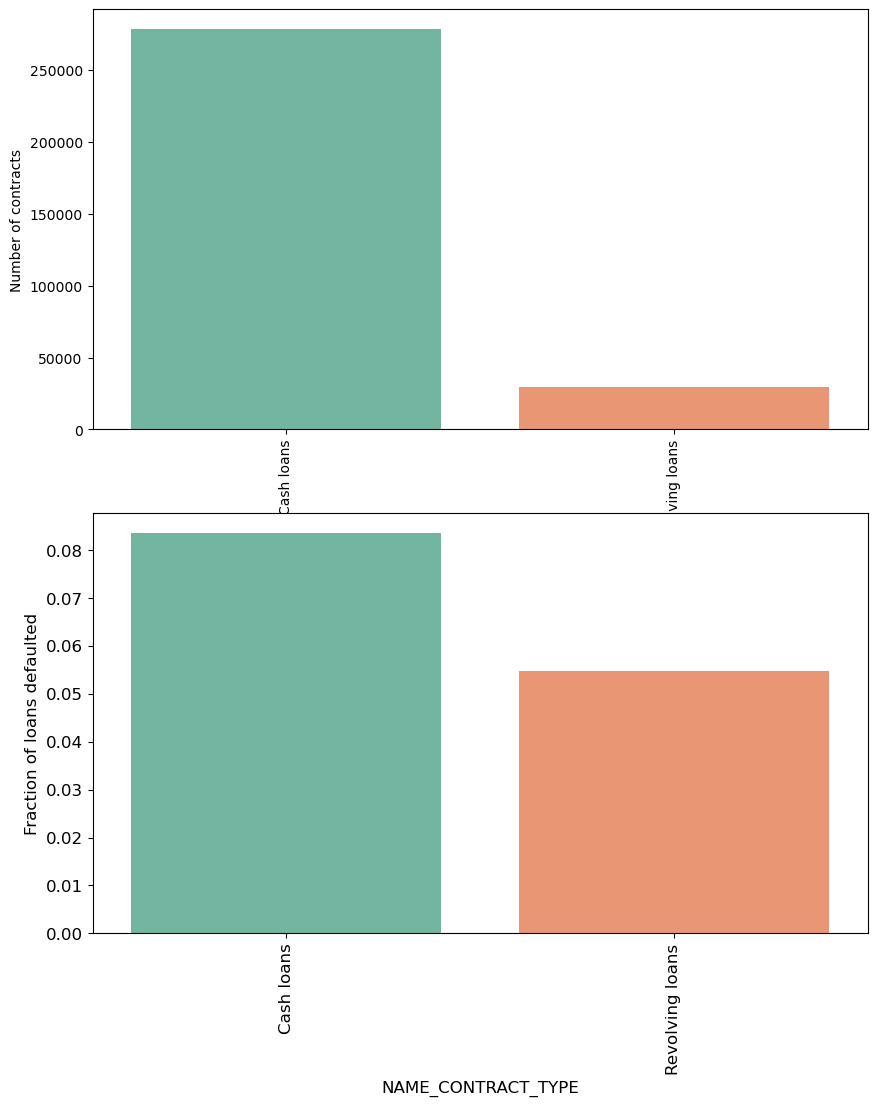

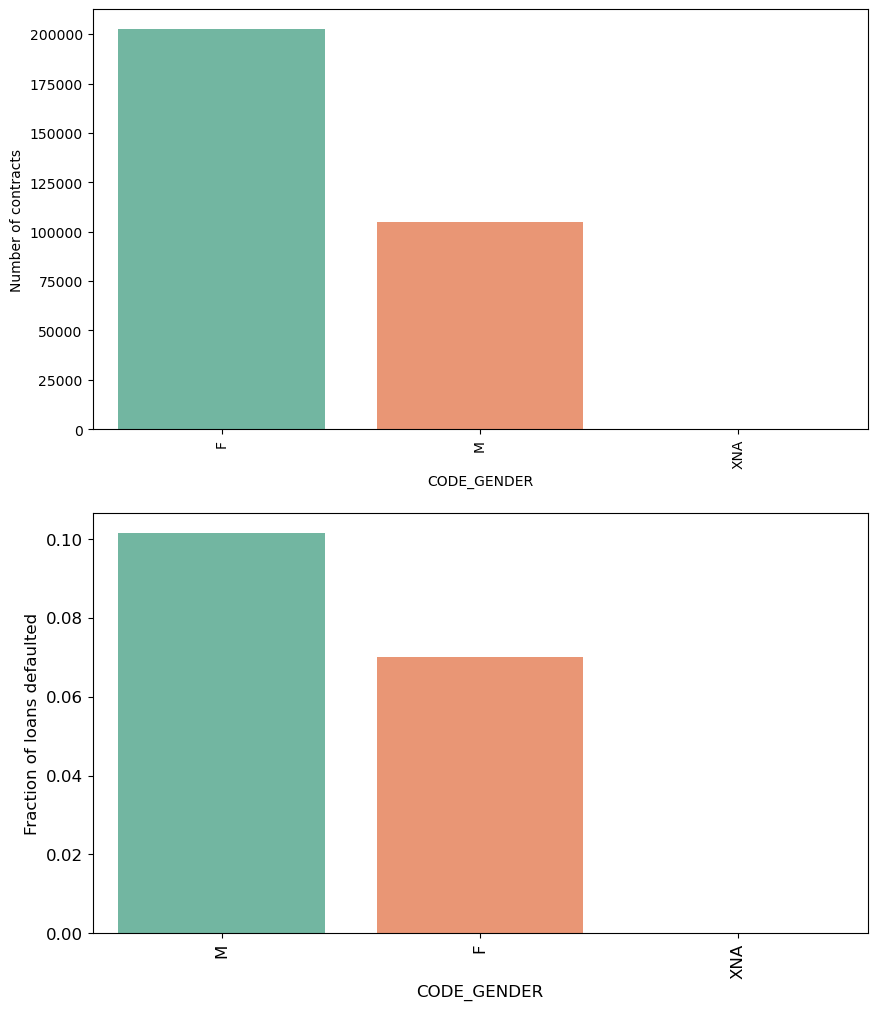

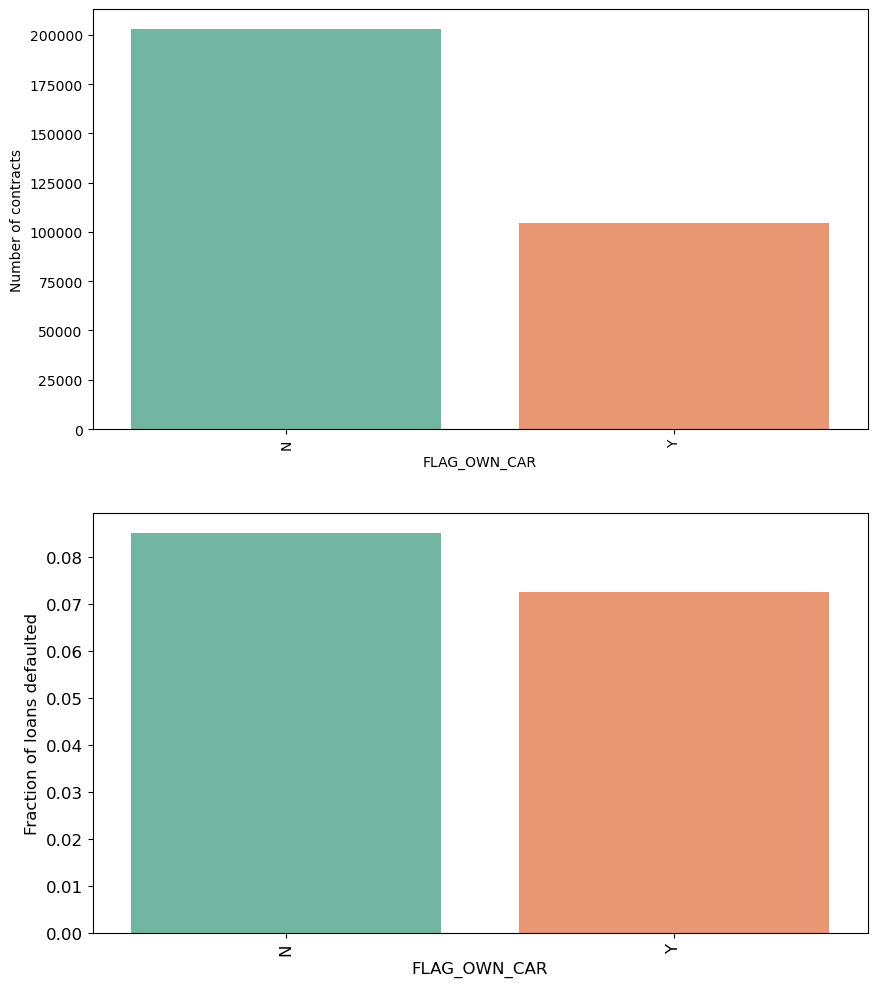

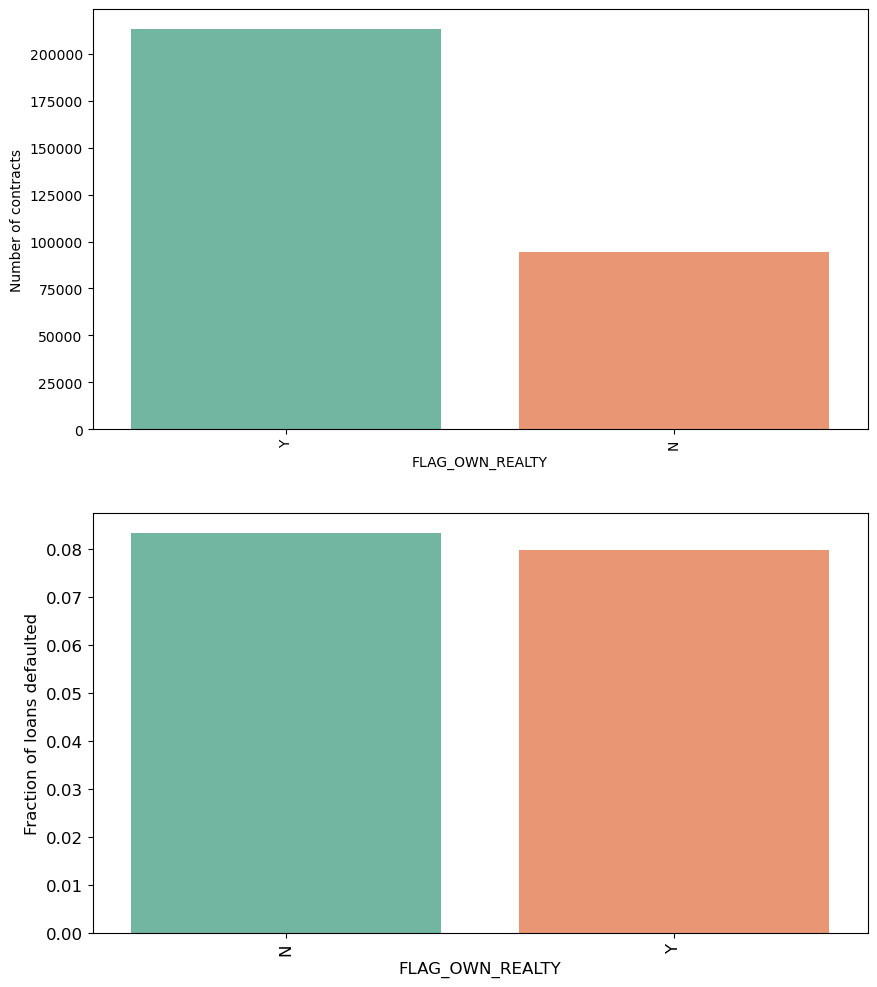

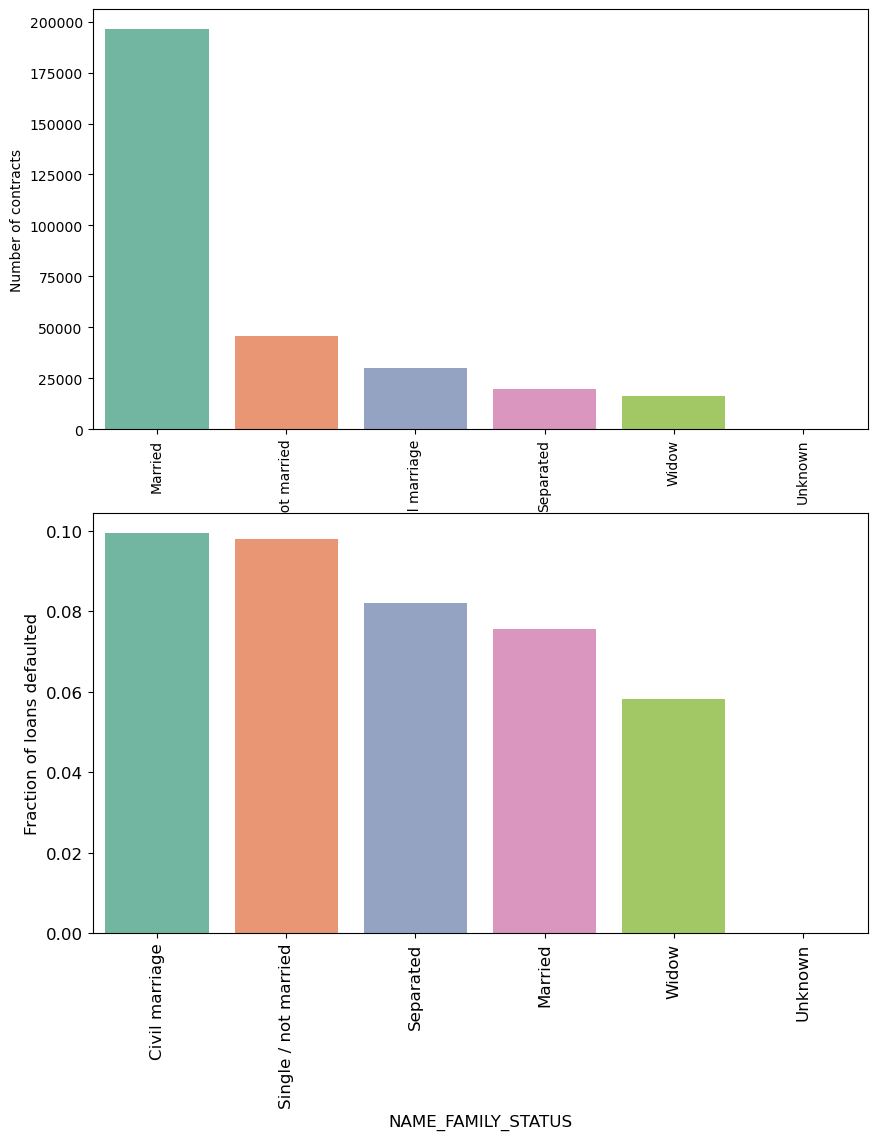

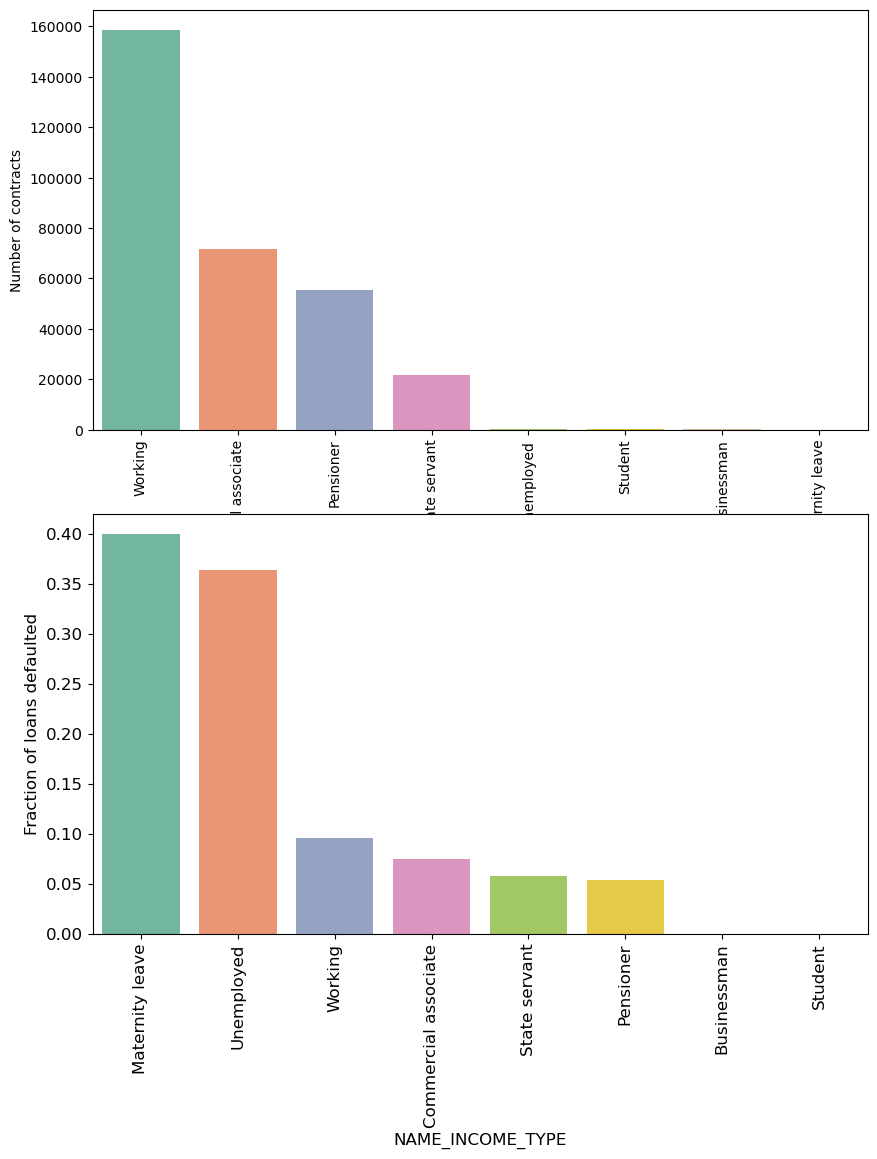

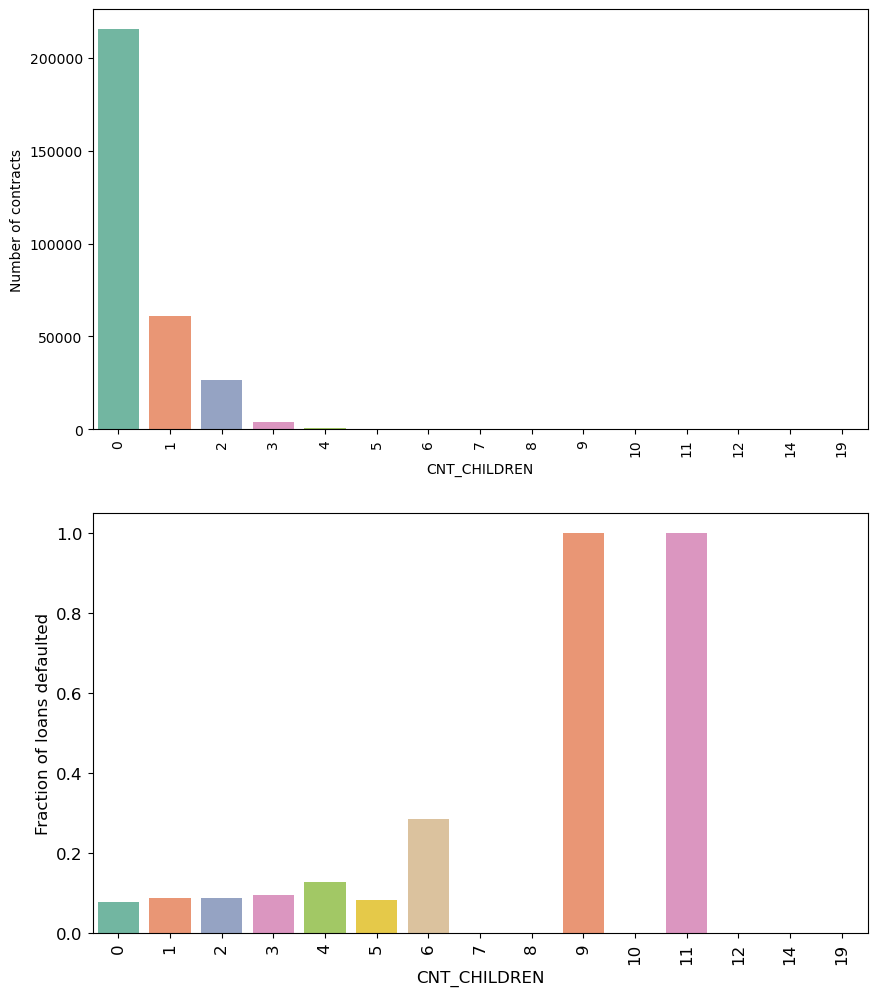

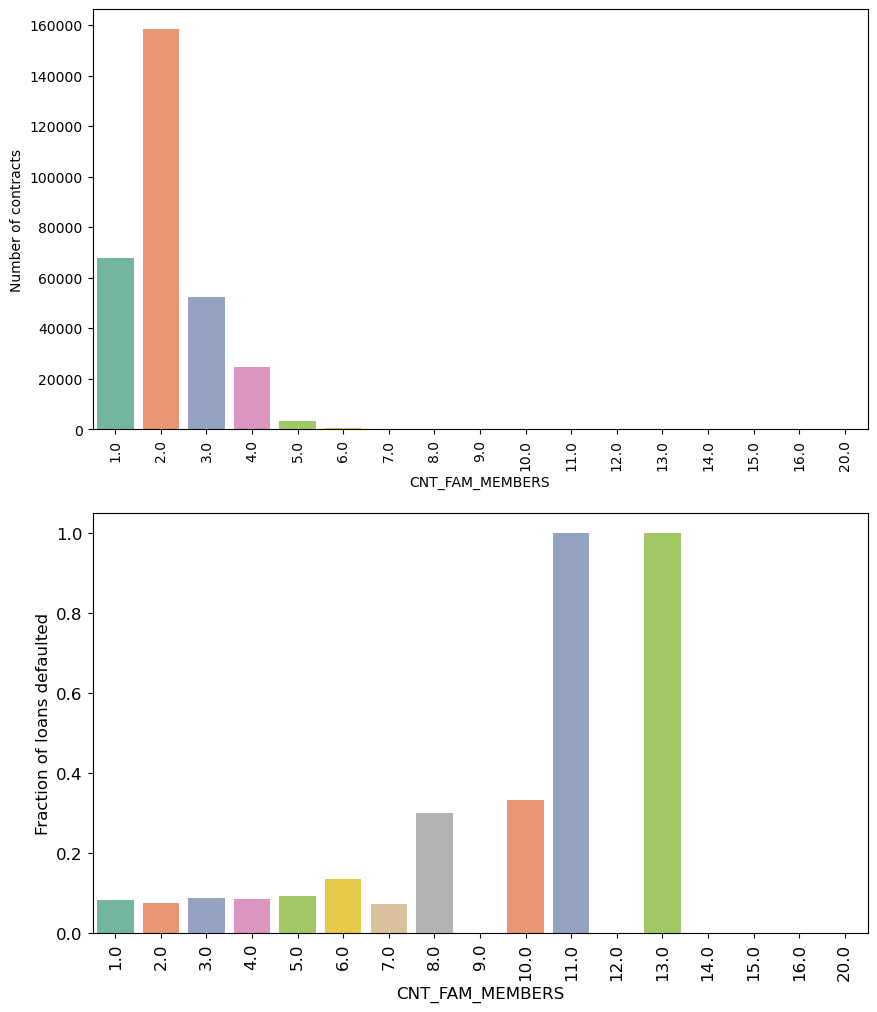

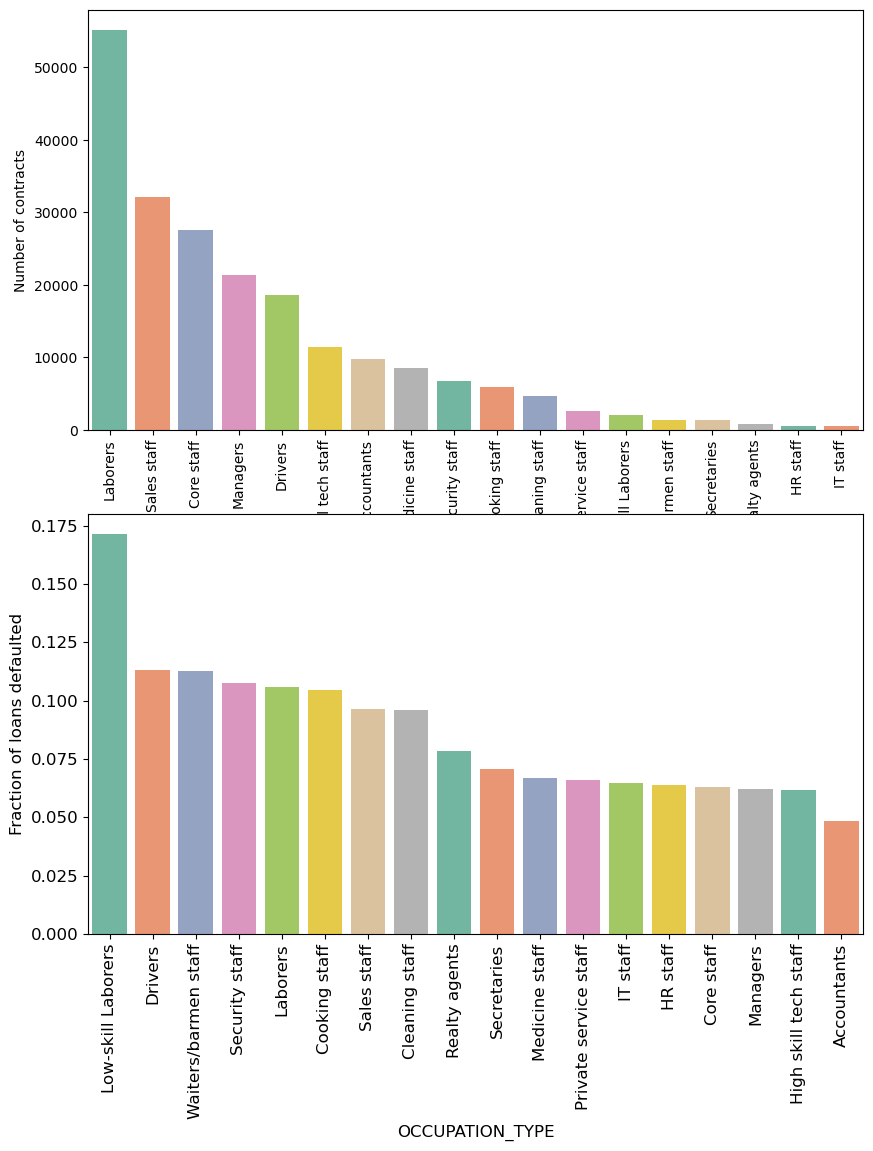

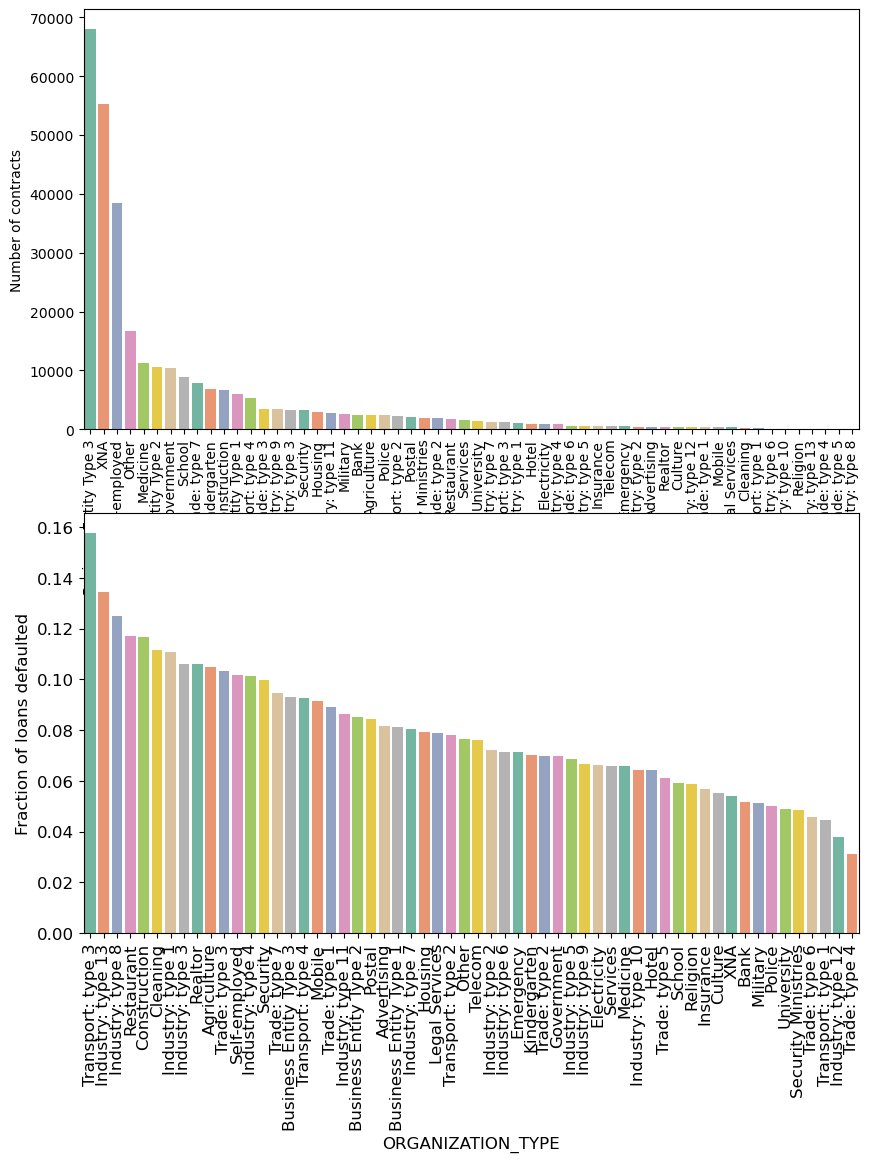

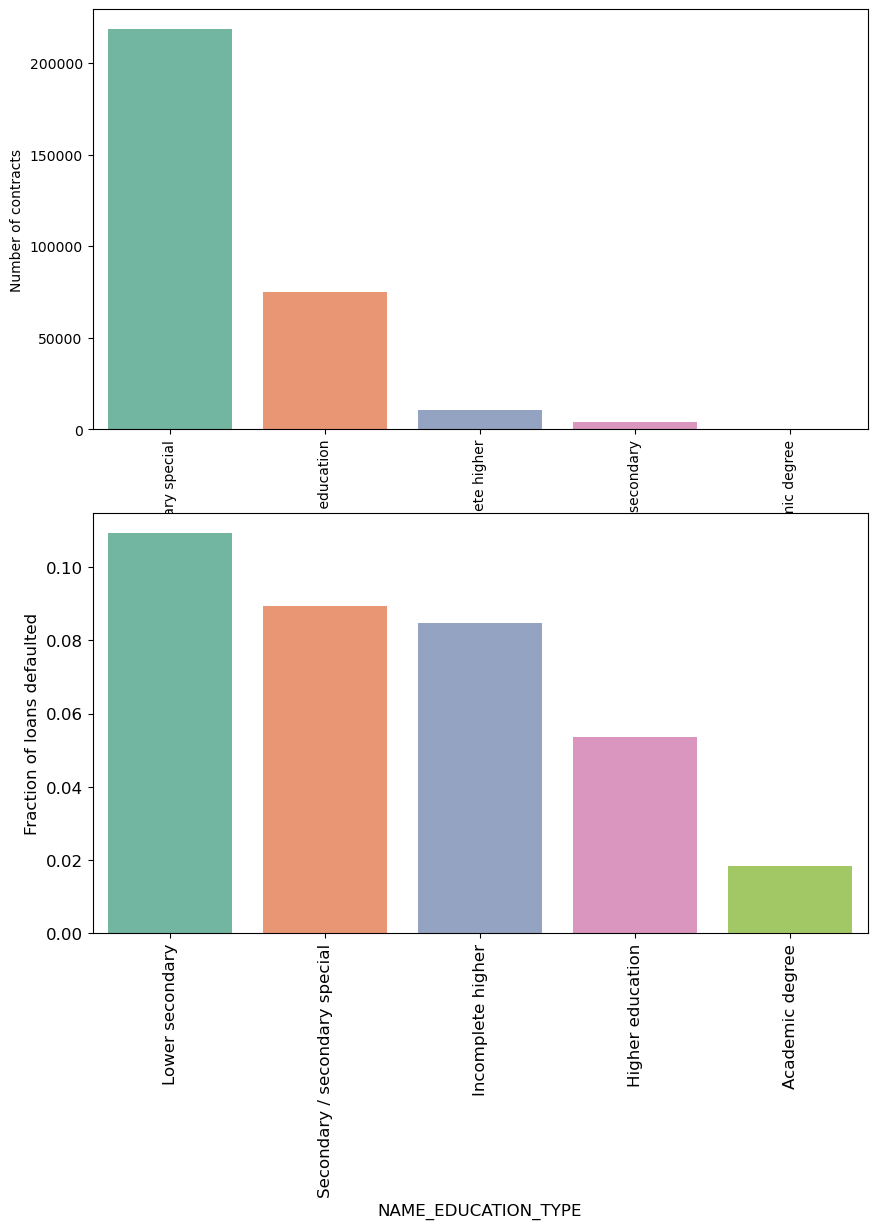

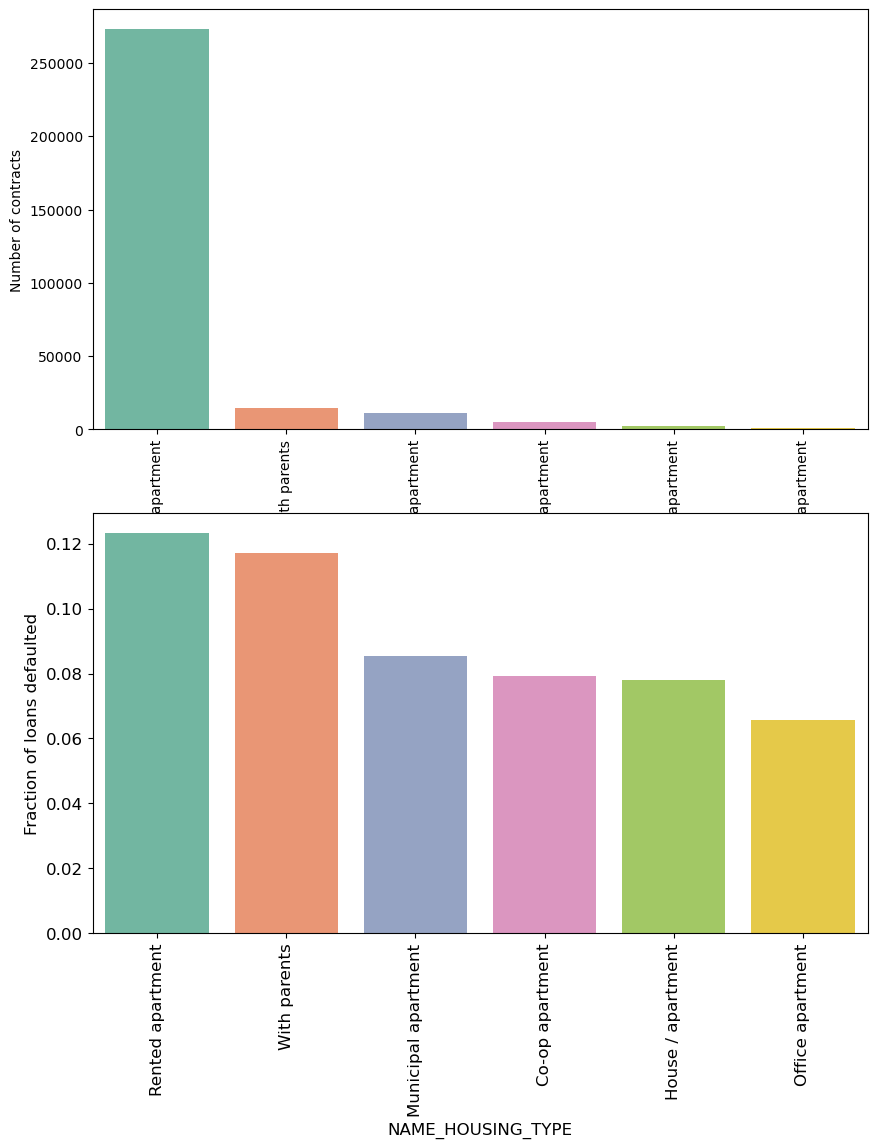

(<Axes: xlabel='REG_CITY_NOT_WORK_CITY', ylabel='Number of contracts'>,
 <Axes: xlabel='REG_CITY_NOT_WORK_CITY', ylabel='Fraction of loans defaulted'>)

In [16]:

plot_bar_gen('NAME_CONTRACT_TYPE', palette="Set2")
plot_bar_gen('CODE_GENDER', palette="Set2")
plot_bar_gen('FLAG_OWN_CAR', palette="Set2")
plot_bar_gen('FLAG_OWN_REALTY', palette="Set2")
plot_bar_gen('NAME_FAMILY_STATUS', palette="Set2")
plot_bar_gen('NAME_INCOME_TYPE', palette="Set2")
plot_bar_gen('CNT_CHILDREN', palette="Set2", show=False)
plot_bar_gen('CNT_FAM_MEMBERS', palette="Set2", show=False)
plot_bar_gen('OCCUPATION_TYPE', palette="Set2")
plot_bar_gen('ORGANIZATION_TYPE', palette="Set2", show=False)
plot_bar_gen('NAME_EDUCATION_TYPE', palette="Set2")
plot_bar_gen('NAME_HOUSING_TYPE', palette="Set2")
plot_bar_gen('REG_REGION_NOT_LIVE_REGION', palette="Set2", show=False)
plot_bar_gen('REG_REGION_NOT_WORK_REGION', palette="Set2", show=False)
plot_bar_gen('REG_CITY_NOT_LIVE_CITY', palette="Set2", show=False)
plot_bar_gen('REG_CITY_NOT_WORK_CITY', palette="Set2", show=False)


In [17]:
def plot_distribution_gen(feature, df=None, separate_target=False):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    if df is None:
        df = at  
    
    if not separate_target:
        plt.figure(figsize=(10,6))
        sns.histplot(df[feature].dropna(), color='blue', kde=True, bins=100)
        plt.xlabel(feature)
        plt.title(f"Distribution of {feature}")
        plt.show()
    else:
        t1 = df.loc[df['TARGET'] != 0]
        t0 = df.loc[df['TARGET'] == 0]
        
        plt.figure(figsize=(10,6))
        sns.histplot(t1[feature].dropna(), color='red', kde=True, bins=100, label='TARGET != 0', alpha=0.5)
        sns.histplot(t0[feature].dropna(), color='blue', kde=True, bins=100, label='TARGET == 0', alpha=0.5)
        plt.legend()
        plt.xlabel(feature)
        plt.title(f"Distribution of {feature} by TARGET")
        plt.show()


In [18]:
def get_thresh(feature):
    """ Outliers are usually > 3 standard deviations away from the mean. """
    ave=np.mean(at[column])
    sdev=np.std(at[column])
    threshold=round(ave+(3*sdev),2)
    print('Threshold for', column,':', threshold)
    return threshold

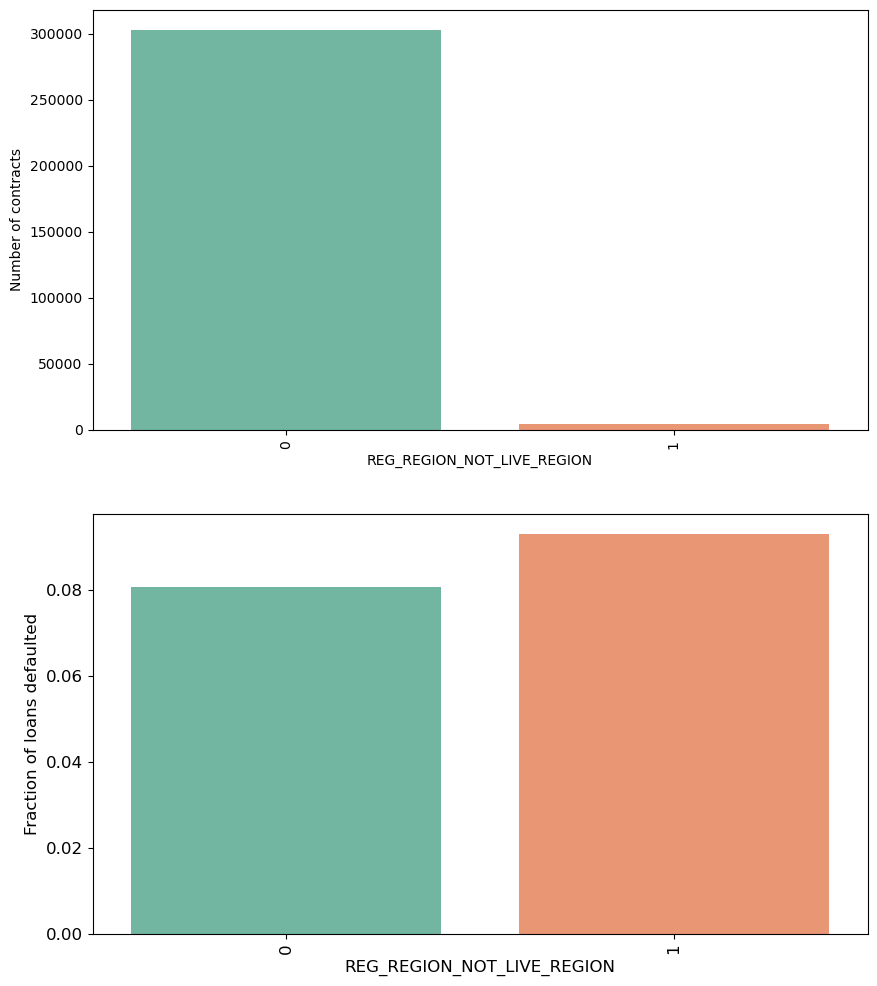

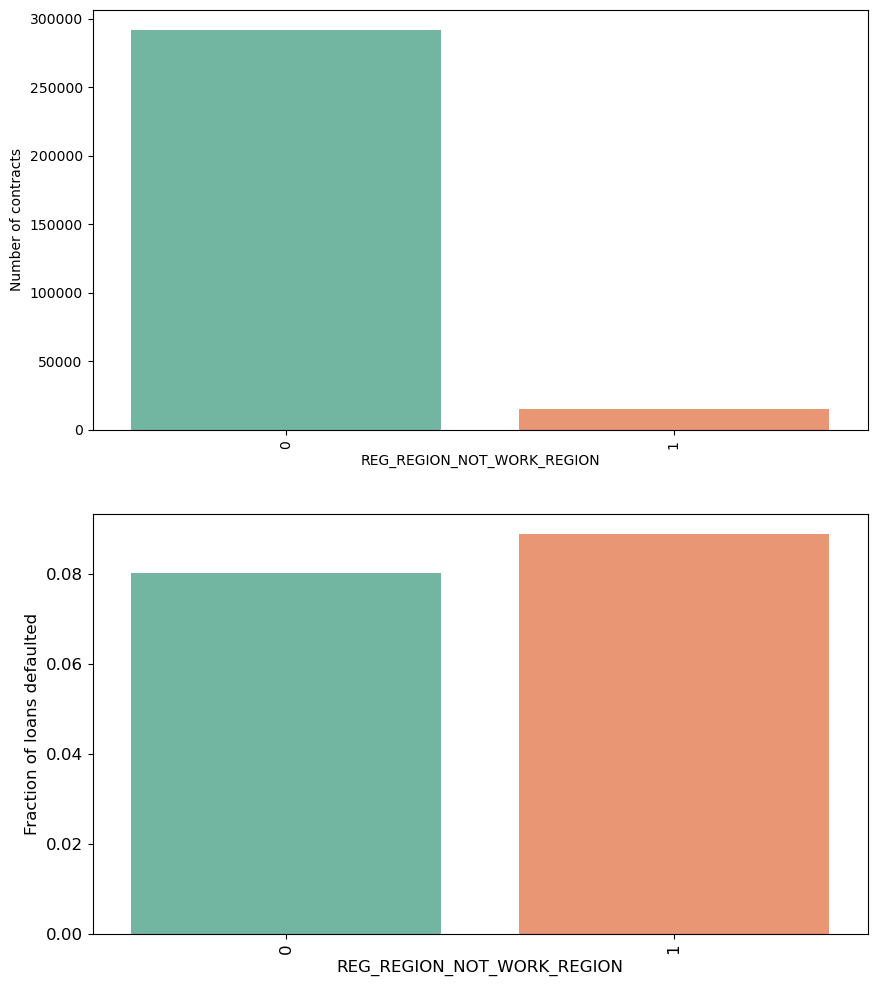

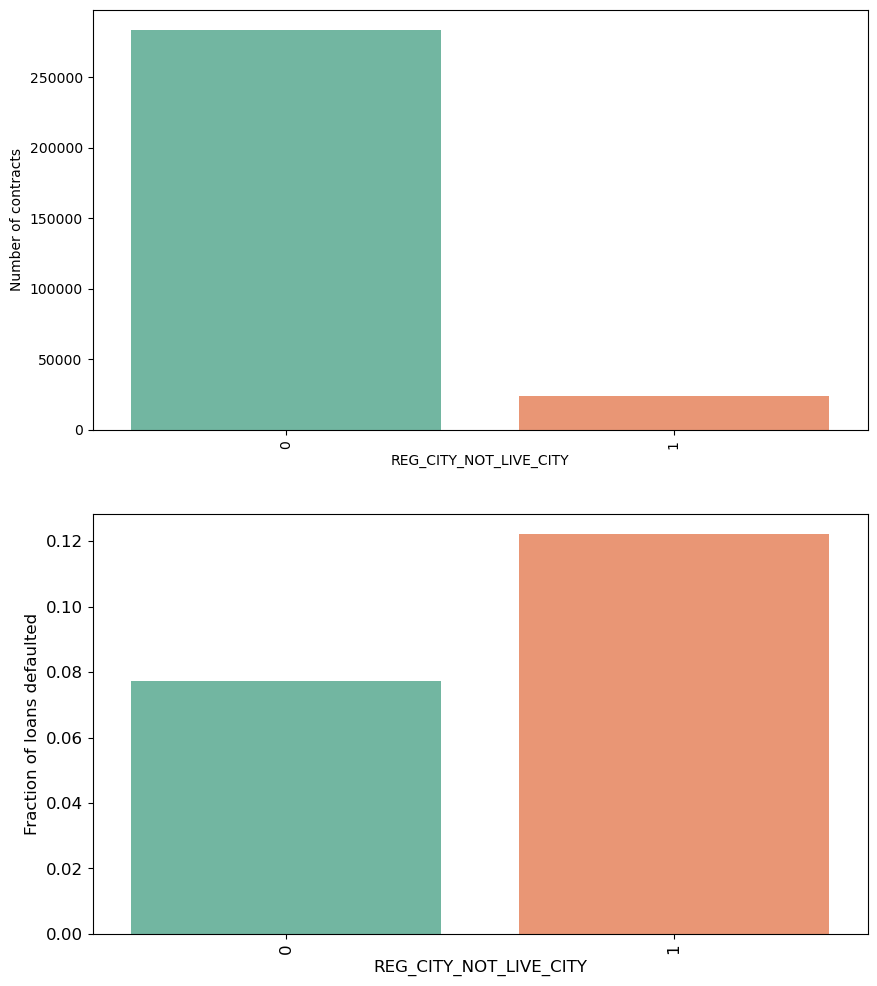

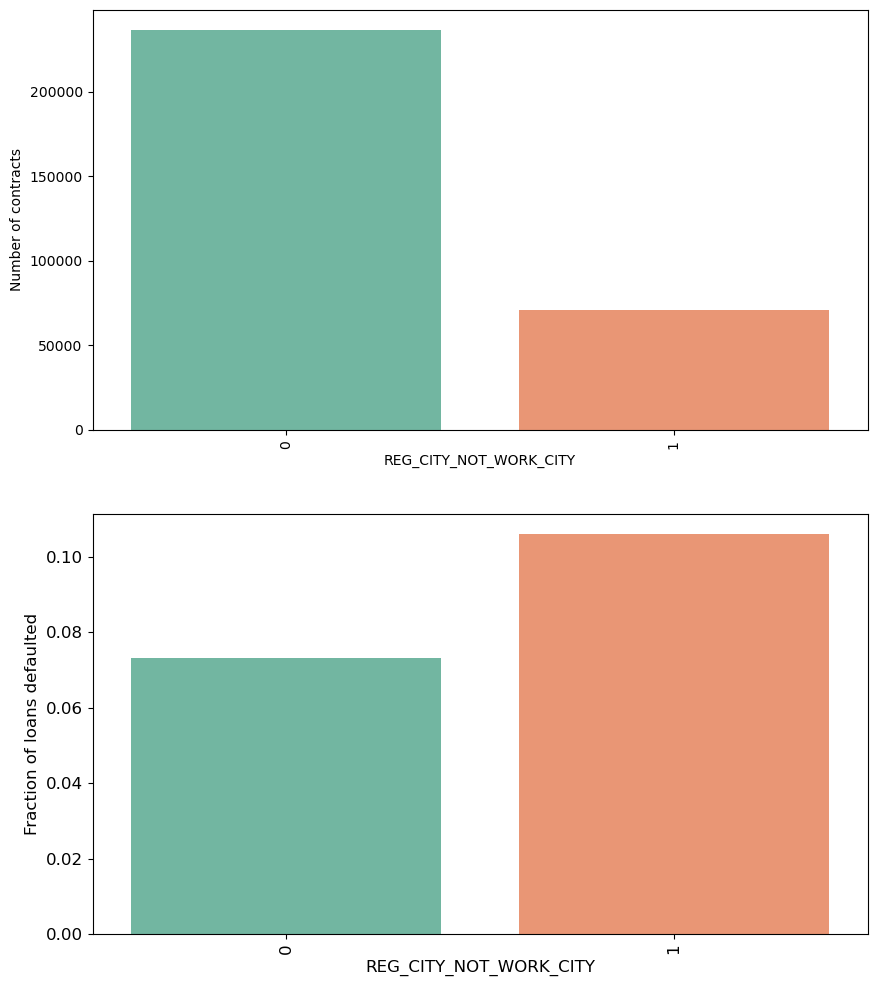

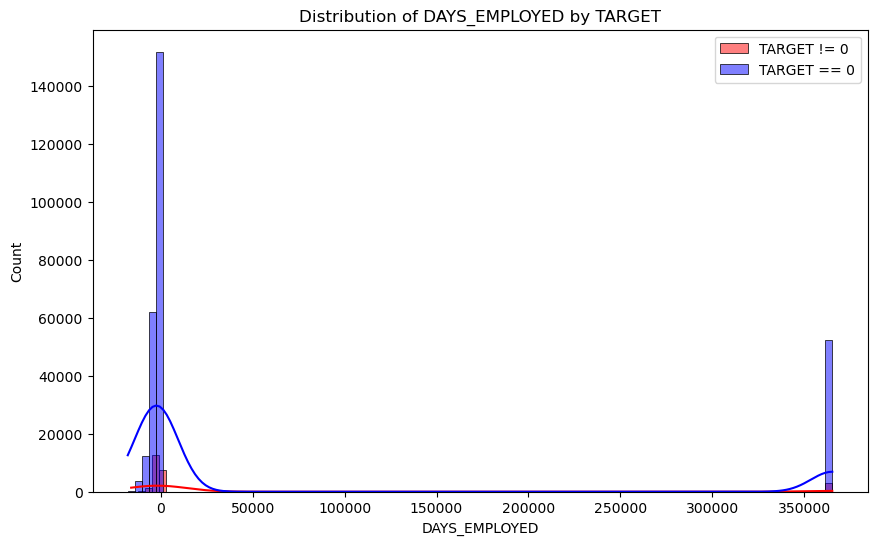

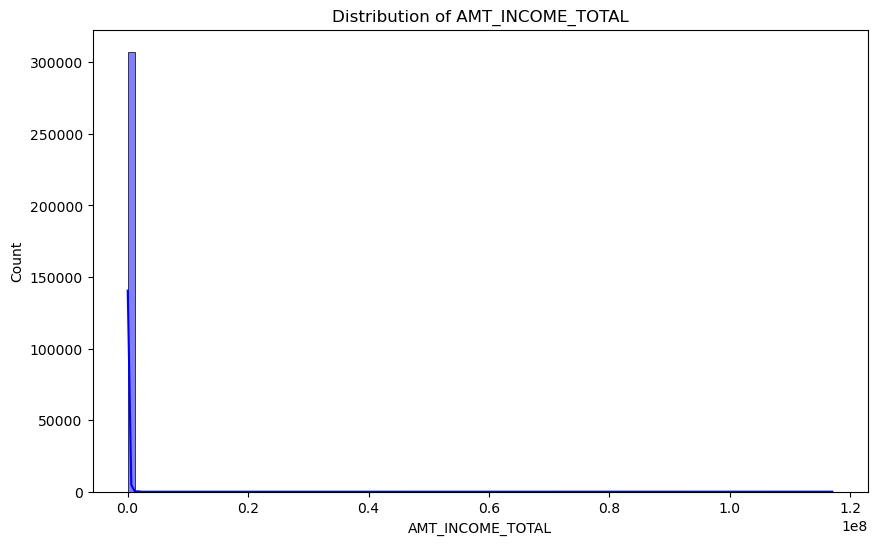

In [19]:
plot_distribution_gen('DAYS_EMPLOYED',None,True)
plot_distribution_gen('AMT_INCOME_TOTAL')

In [20]:
def create_income_band(df):
    df.loc[(df.AMT_INCOME_TOTAL < 30000),'INCOME_BAND'] = 1
    df.loc[(df.AMT_INCOME_TOTAL >= 30000)&(df.AMT_INCOME_TOTAL < 65000),'INCOME_BAND'] = 2
    df.loc[(df.AMT_INCOME_TOTAL >= 65000)&(df.AMT_INCOME_TOTAL < 95000),'INCOME_BAND'] = 3
    df.loc[(df.AMT_INCOME_TOTAL >= 95000)&(df.AMT_INCOME_TOTAL < 130000),'INCOME_BAND'] = 4
    df.loc[(df.AMT_INCOME_TOTAL >= 130000)&(df.AMT_INCOME_TOTAL < 160000),'INCOME_BAND'] = 5
    df.loc[(df.AMT_INCOME_TOTAL >= 160000)&(df.AMT_INCOME_TOTAL < 190000),'INCOME_BAND'] = 6
    df.loc[(df.AMT_INCOME_TOTAL >= 190000)&(df.AMT_INCOME_TOTAL < 220000),'INCOME_BAND'] = 7
    df.loc[(df.AMT_INCOME_TOTAL >= 220000)&(df.AMT_INCOME_TOTAL < 275000),'INCOME_BAND'] = 8
    df.loc[(df.AMT_INCOME_TOTAL >= 275000)&(df.AMT_INCOME_TOTAL < 325000),'INCOME_BAND'] = 9
    df.loc[(df.AMT_INCOME_TOTAL >= 325000),'INCOME_BAND'] = 10
    return df

In [21]:
create_income_band(at);

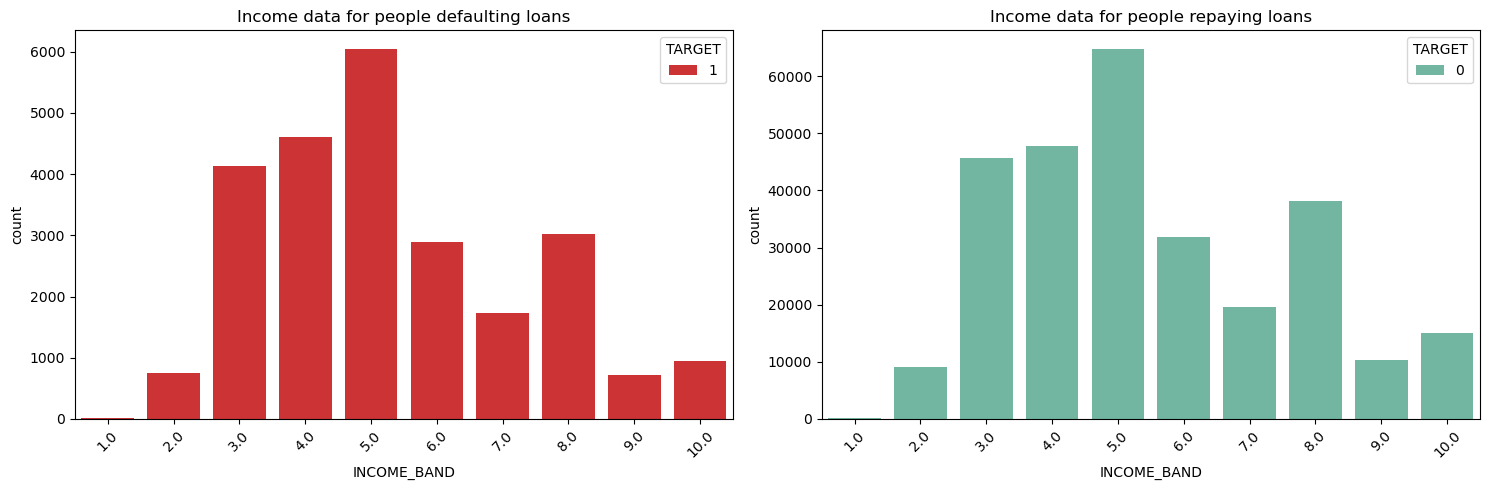

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(data=at[at.TARGET==1],x='INCOME_BAND',hue='TARGET',palette='Set1').set_title('Income data for people defaulting loans')
plt.xticks(rotation=45)
plt.subplot(122)
sns.countplot(data=at[at.TARGET==0],x='INCOME_BAND',hue='TARGET',palette='Set2').set_title('Income data for people repaying loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.nan})

    return df

In [24]:
at = pd.read_csv("application_train.csv")
bureau = pd.read_csv("bureau.csv")
bureau_balance = pd.read_csv("bureau_balance.csv")
credit_card_balance = pd.read_csv("credit_card_balance.csv")
installments_payments = pd.read_csv("installments_payments.csv")
pos_cash_balance = pd.read_csv("POS_CASH_balance.csv")
previous_application = pd.read_csv("previous_application.csv")

# Apply outlier replacement
at_new = replace_day_outliers(at)
bu_new = replace_day_outliers(bureau)              
bub_new = replace_day_outliers(bureau_balance)      
ccb_new = replace_day_outliers(credit_card_balance) 
ip_new = replace_day_outliers(installments_payments)
pcb_new = replace_day_outliers(pos_cash_balance)   
pa_new = replace_day_outliers(previous_application)

In [25]:
def remove_missing_col(df):
    miss_at = pd.DataFrame((df.isnull().sum())*100/df.shape[0])
    miss_at_col=miss_at[miss_at[0]>60].index
    at_new  = df[[i for i in df.columns if i not in miss_at_col]]
    return dat_new

In [26]:
class MissingImputer:
    def __init__(self):
        """
        Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.
        """
        pass

    def fit(self, X, y=None):
        self.fill = pd.Series(
            [
                X[c].value_counts().index[0] 
                if X[c].dtype == np.dtype('O') else X[c].median() 
                for c in X
            ],
            index=X.columns
        )
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [27]:
at_train = pd.get_dummies(at_new)

In [28]:
at_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 246 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    SK_ID_CURR                                         int64  
 1    TARGET                                             int64  
 2    CNT_CHILDREN                                       int64  
 3    AMT_INCOME_TOTAL                                   float64
 4    AMT_CREDIT                                         float64
 5    AMT_ANNUITY                                        float64
 6    AMT_GOODS_PRICE                                    float64
 7    REGION_POPULATION_RELATIVE                         float64
 8    DAYS_BIRTH                                         int64  
 9    DAYS_EMPLOYED                                      float64
 10   DAYS_REGISTRATION                                  float64
 11   DAYS_ID_PUBLISH                      

In [29]:
from sklearn.preprocessing import MinMaxScaler
class DataFrameImputer(object):
    def __init__(self):
        """Impute missing values.
        - object columns → most frequent value
        - numeric columns → median value
        """
    def fit(self, X, y=None):
        self.fill = pd.Series(
            [X[c].value_counts().index[0] if X[c].dtype == np.dtype('O') else X[c].median() 
             for c in X],
            index=X.columns
        )
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)
        
skid_temp = at_new['SK_ID_CURR']
train = at_train.drop(columns=['SK_ID_CURR'])

features = list(train.columns)
scaler = MinMaxScaler(feature_range=(0, 1))
train = DataFrameImputer().fit_transform(train)
scaler.fit(train)
train = scaler.transform(train)
data_train = pd.DataFrame(data=train, columns=features)

print('Data shape: ', at_train.shape)

Data shape:  (307511, 246)


In [30]:
X= at_train.drop('TARGET',axis=1)
y= at_train['TARGET']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size= 0.25, stratify=y, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [33]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
imputer = SimpleImputer(strategy='median') 
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

accuracy_scores = []

for name, model in models.items():
    model.fit(X_train_imputed, y_train)        
    y_pred = model.predict(X_test_imputed)     
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"{name}: {accuracy:.4f}")

LogisticRegression: 0.9192
RandomForestClassifier: 0.9194
DecisionTreeClassifier: 0.8506
KNeighborsClassifier: 0.9140
XGBClassifier: 0.9193


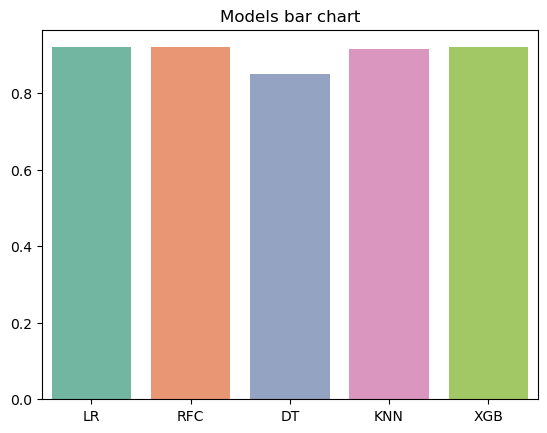

In [34]:
sns.barplot(x= ['LR','RFC','DT','KNN','XGB'],y=accuracy_scores, palette='Set2').set_title('Models bar chart')
plt.show()

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     70672
           1       0.50      0.04      0.07      6206

    accuracy                           0.92     76878
   macro avg       0.71      0.52      0.51     76878
weighted avg       0.89      0.92      0.89     76878



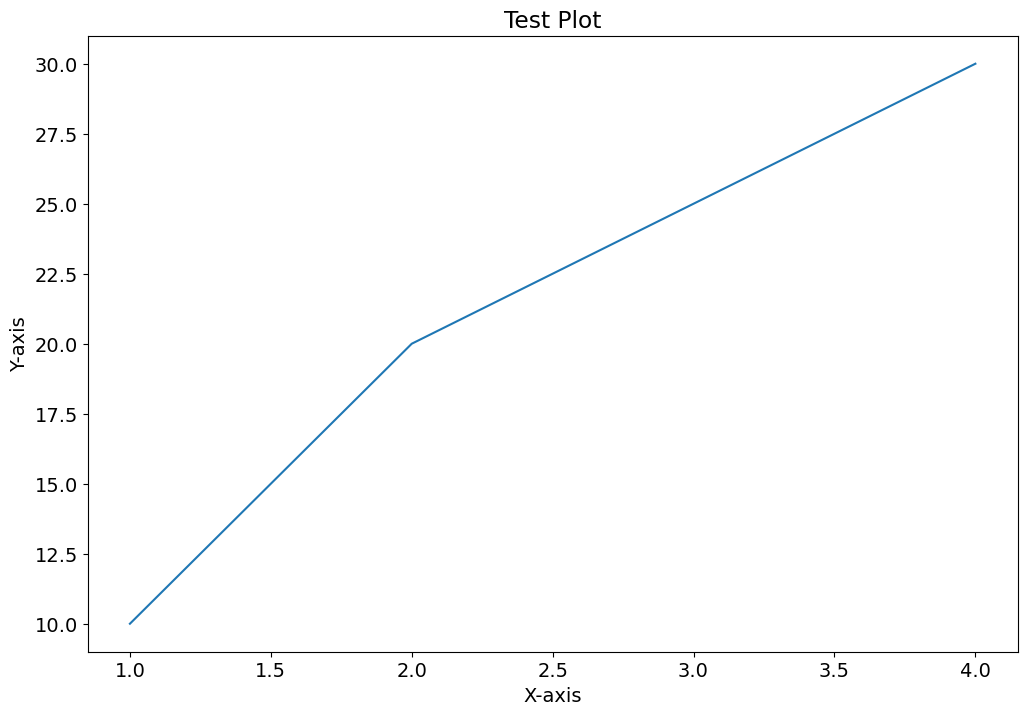

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.title("Test Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

plt.show()


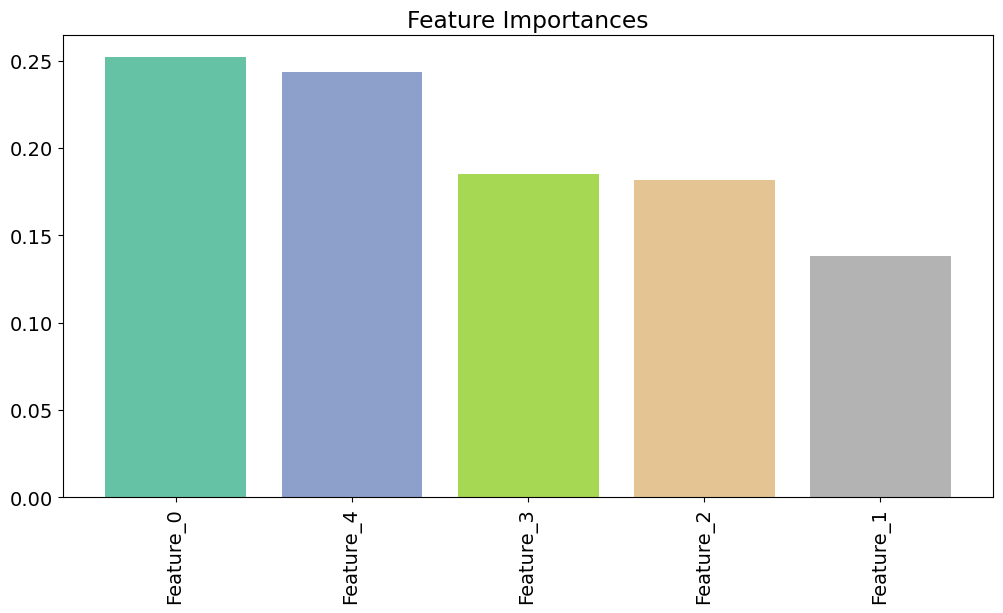

In [43]:
import matplotlib.cm as cm
X = pd.DataFrame(np.random.rand(100, 5), columns=[f'Feature_{i}' for i in range(5)])
y = X.sum(axis=1) + np.random.rand(100)*0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
colors = cm.Set2(np.linspace(0, 1, len(importances)))

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], color=colors)
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.show()

In [38]:
rf.feature_importances_

array([0.2003783 , 0.25077612, 0.18415877, 0.17141746, 0.19326935])

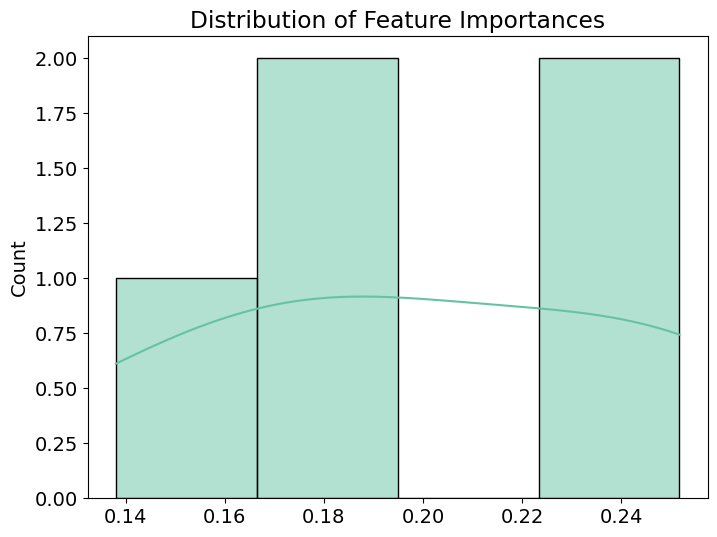

In [49]:
plt.figure(figsize=(8,6))
sns.histplot(rf.feature_importances_, kde=True, color=colors[0])
plt.title("Distribution of Feature Importances")
plt.show()

# Report on Challenges Faced and Techniques Used in Data Processing
1. Missing Values
Challenge:
The dataset contained missing values (NaNs) in various features. Missing data can bias model training, reduce accuracy, and cause errors in algorithms like Logistic Regression that do not accept NaNs natively.

Technique Used:
We used the SimpleImputer from sklearn.impute with the strategy set to 'median' to replace missing numerical values. For categorical features, we could also use the most frequent value imputation. Median imputation is robust to outliers and preserves the central tendency of the data.

Reason:
Imputation allows us to retain all rows without dropping samples, which maintains the dataset size and the model’s generalization power. Median is less affected by outliers than mean, making it a safer choice for skewed data.

2. Data Scaling
Challenge:
Features in the dataset were on different scales (e.g., some features ranged from 0 to 1, others from 0 to thousands). Many machine learning algorithms, like K-Nearest Neighbors and Logistic Regression, perform better when features are on a comparable scale.

Technique Used:
Applied Min-Max scaling (MinMaxScaler from sklearn.preprocessing) to transform all feature values into the range [0, 1].

Reason:
Min-Max scaling maintains the shape of the original distribution and normalizes features to a consistent scale, improving model convergence speed and performance.

3. Handling Categorical Variables
Challenge:
Some features were categorical (textual) rather than numerical. Most ML algorithms require numerical input.

Technique Used:
Categorical features were either encoded using one-hot encoding or imputed using the most frequent category.

Reason:
One-hot encoding converts categories into a format suitable for ML models without implying ordinal relationships, preserving the meaning of categories.

4. Model Compatibility with Missing Data
Challenge:
Certain classifiers, such as LogisticRegression, do not support missing values inherently and throw errors if NaNs are present.

Technique Used:
Performed imputation prior to training to remove missing values, ensuring compatibility.

Reason:
This preprocessing step prevents runtime errors and ensures fair model comparisons.

